In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Epoch 1/20
1612/1612 - 8s - loss: 0.0792 - 8s/epoch - 5ms/step
Epoch 2/20
1612/1612 - 5s - loss: 0.0050 - 5s/epoch - 3ms/step
Epoch 3/20
1612/1612 - 5s - loss: 2.4872e-04 - 5s/epoch - 3ms/step
Epoch 4/20
1612/1612 - 5s - loss: 2.4191e-04 - 5s/epoch - 3ms/step
Epoch 5/20
1612/1612 - 5s - loss: 2.4011e-04 - 5s/epoch - 3ms/step
Epoch 6/20
1612/1612 - 5s - loss: 2.4535e-04 - 5s/epoch - 3ms/step
Epoch 7/20
1612/1612 - 5s - loss: 2.3768e-04 - 5s/epoch - 3ms/step
Epoch 8/20
1612/1612 - 4s - loss: 2.3891e-04 - 4s/epoch - 3ms/step
Epoch 9/20
1612/1612 - 5s - loss: 2.3872e-04 - 5s/epoch - 3ms/step
Epoch 10/20
1612/1612 - 4s - loss: 2.3621e-04 - 4s/epoch - 3ms/step
Epoch 11/20
1612/1612 - 5s - loss: 2.4144e-04 - 5s/epoch - 3ms/step
Epoch 12/20
1612/1612 - 5s - loss: 2.3557e-04 - 5s/epoch - 3ms/step
Epoch 13/20
1612/1612 - 5s - loss: 2.3993e-04 - 5s/epoch - 3ms/step
Epoch 14/20
1612/1612 - 5s - loss: 2.3809e-04 - 5s/epoch - 3ms/step
Epoch 15/20
1612/1612 - 4s - loss: 2.4302e-04 - 4s/epoch - 3ms/st

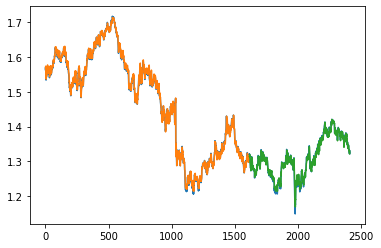

In [5]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY) 

# load the dataset
dataframe = read_csv('Basil_Data.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32') 

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size 
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:] 

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back) 

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1])) 

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY]) 

# calculate root mean squared error
trainScore = mean_squared_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MSE' % (trainScore))
testScore = mean_squared_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()